# Mid-Term Project

Problem Statement: Predict whether patients will have reccurant events

In [776]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import preprocessing, neighbors, model_selection, ensemble, svm, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns
import warnings

In [777]:
# fetch dataset, save as breast cancer dataframe (bcdf)
column_labels = ['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
bcdf = pd.read_csv('breast-cancer.data')
bcdf.columns = column_labels

### Exploratory Data Analysis

In [778]:
bcdf.shape

(285, 10)

In [779]:
bcdf.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [780]:
bcdf.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,285,285,285,285,285,285,285.000000,285,285,285
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,200,96,149,59,212,221,NaN,151,109,217
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.045614,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.737351,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [781]:
for column in column_labels:
    print(column, bcdf[column].unique())
    print('\n', bcdf[column].value_counts())

Class ['no-recurrence-events' 'recurrence-events']

 Class
no-recurrence-events    200
recurrence-events        85
Name: count, dtype: int64
age ['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']

 age
50-59    96
40-49    90
60-69    57
30-39    35
70-79     6
20-29     1
Name: count, dtype: int64
menopause ['premeno' 'ge40' 'lt40']

 menopause
premeno    149
ge40       129
lt40         7
Name: count, dtype: int64
tumor-size ['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']

 tumor-size
30-34    59
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64
inv-nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']

 inv-nodes
0-2      212
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64
node-caps ['no' 'yes' '?']

 node-caps
no     221
yes     56
?        8
Name: count, dtype: int64
deg-malig [2 1 3]

 deg-m

In this dataset, '?' signifies missing data, so calling .unique() will display which columns have missing data (if any).  Columns 'node-caps' and 'breast-quad' have missing data.  Fill in missing data with data that is most common.  For 'node-caps' attribute, the most common value is 'no' with 221 out of 285 being 'no'.  For 'breast-quad' attribute, the most common value is 'low_left' with 109 out of 285 being 'low_left'.

In [782]:
bcdf['node-caps'].replace(to_replace='?', value='no', inplace=True)
bcdf['breast-quad'].replace(to_replace='?', value='left_low', inplace=True)

In [783]:
bcdf.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Class,285,2,no-recurrence-events,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,285,6,50-59,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
menopause,285,3,premeno,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tumor-size,285,11,30-34,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inv-nodes,285,7,0-2,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node-caps,285,2,no,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deg-malig,285.0,NaN,NaN,NaN,2.045614,0.737351,1.0,2.0,2.0,3.0,3.0
breast,285,2,left,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breast-quad,285,5,left_low,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irradiat,285,2,no,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [784]:
for column in column_labels:
    print(column, bcdf[column].unique())

Class ['no-recurrence-events' 'recurrence-events']
age ['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
menopause ['premeno' 'ge40' 'lt40']
tumor-size ['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps ['no' 'yes']
deg-malig [2 1 3]
breast ['right' 'left']
breast-quad ['right_up' 'left_low' 'left_up' 'right_low' 'central']
irradiat ['no' 'yes']


There is no more missing data. Next I need to replace the categorical data with numerical data.  The 'Class', 'node-cap', 'breast', and 'irradiat' attributes can be binarized. 

In [785]:
bcdf['Class'].replace(to_replace='no-recurrence-events', value='0', inplace=True)
bcdf['Class'].replace(to_replace='recurrence-events', value='1', inplace=True)

bcdf['node-caps'].replace(to_replace='no', value='0', inplace=True)
bcdf['node-caps'].replace(to_replace='yes', value='1', inplace=True)

bcdf['breast'].replace(to_replace='right', value='0', inplace=True)
bcdf['breast'].replace(to_replace='left', value='1', inplace=True)

bcdf['irradiat'].replace(to_replace='no', value='0', inplace=True)
bcdf['irradiat'].replace(to_replace='yes', value='1', inplace=True)

Utilize label encoding

In [786]:
oe_age = OrdinalEncoder(categories=[['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']])
oe_meo = OrdinalEncoder(categories=[['lt40', 'ge40', 'premeno']])
oe_ts = OrdinalEncoder(categories=[['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59']])
oe_iv = OrdinalEncoder(categories=[['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21-23','24-26','27-29','30-32','33-35','36-39']])

bcdf['age'] = oe_age.fit_transform(bcdf[['age']])
bcdf['menopause'] = oe_meo.fit_transform(bcdf[['menopause']])
bcdf['tumor-size'] = oe_ts.fit_transform(bcdf[['tumor-size']])
bcdf['inv-nodes'] = oe_iv.fit_transform(bcdf[['inv-nodes']])

Use One Hot Encoder to binarize nominal data (breast-quad)

In [787]:
print(bcdf['breast-quad'].unique())
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
breastquadtransform = ohe.fit_transform(bcdf[['breast-quad']])

['right_up' 'left_low' 'left_up' 'right_low' 'central']


In [788]:
bcdf = pd.concat([bcdf, breastquadtransform], axis=1)
bcdf.drop(['breast-quad'], axis=1, inplace=True)
bcdf.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,0,3.0,2.0,4.0,0.0,0,2,0,0,0.0,0.0,0.0,0.0,1.0
1,0,3.0,2.0,4.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0
2,0,5.0,1.0,3.0,0.0,0,2,0,0,0.0,0.0,1.0,0.0,0.0
3,0,3.0,2.0,0.0,0.0,0,2,0,0,0.0,0.0,0.0,1.0,0.0
4,0,5.0,1.0,3.0,0.0,0,2,1,0,0.0,1.0,0.0,0.0,0.0


In [789]:
bcdf.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
Class,1.000000,-0.075897,0.051173,0.176498,0.275144,0.275989,0.303457,0.060927,0.192887,-0.066439,0.050304,-0.047424,-0.031979,0.075694
age,-0.075897,1.000000,-0.670007,-0.007522,-0.037947,-0.057262,-0.079114,0.047497,-0.045551,-0.000983,0.023482,0.051425,-0.088888,-0.033930
menopause,0.051173,-0.670007,1.000000,0.028768,0.001468,0.066170,-0.012875,-0.080146,0.077055,-0.035930,-0.010635,-0.058625,0.093381,0.051286
tumor-size,0.176498,-0.007522,0.028768,1.000000,0.161479,0.205053,0.216500,-0.051622,0.165634,-0.200485,0.005166,0.070053,-0.126372,0.161776
inv-nodes,0.275144,-0.037947,0.001468,0.161479,1.000000,0.587517,0.332209,0.027665,0.323576,-0.082350,0.031991,-0.013215,0.047987,-0.003512
node-caps,0.275989,-0.057262,0.066170,0.205053,0.587517,1.000000,0.329268,0.005835,0.303283,-0.038070,-0.011138,-0.019748,0.009037,0.069430
deg-malig,0.303457,-0.079114,-0.012875,0.216500,0.332209,0.329268,1.000000,0.048827,0.211362,-0.072217,-0.009964,0.056092,-0.035958,0.022269
breast,0.060927,0.047497,-0.080146,-0.051622,0.027665,0.005835,0.048827,1.000000,-0.016957,-0.003399,0.284761,-0.228382,0.108455,-0.186405
irradiat,0.192887,-0.045551,0.077055,0.165634,0.323576,0.303283,0.211362,-0.016957,1.000000,-0.094862,0.029667,0.032248,0.037757,-0.048206
breast-quad_central,-0.066439,-0.000983,-0.035930,-0.200485,-0.082350,-0.038070,-0.072217,-0.003399,-0.094862,1.000000,-0.223607,-0.202588,-0.085525,-0.102062


The strongest positive correlation for 'Class' (recurrance or not) is with 'deg-malig' at 0.303457. Will build a correlation heatmap for easy visualization.

<Axes: >

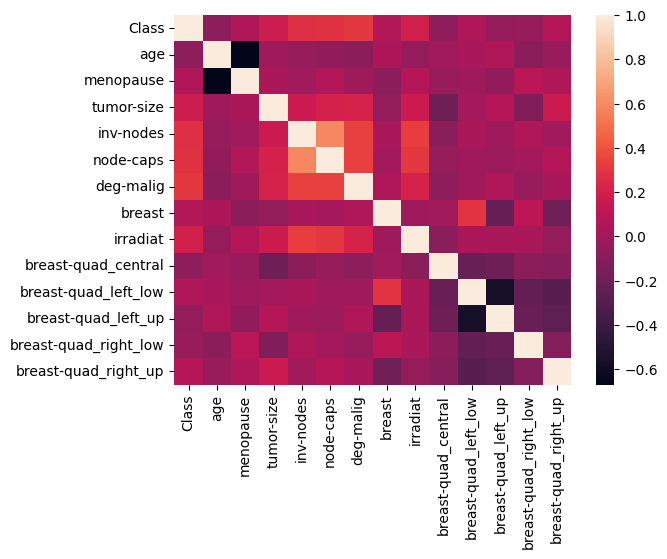

In [790]:
sns.heatmap(bcdf.corr())

In [791]:
# with warnings.catch_warnings():
#     warnings.simplefilter(action='ignore', category=FutureWarning)
#     g = sns.pairplot(bcdf, hue='Class', markers=['o','X'])
#     g.fig.suptitle('Pairplot of breast cancer dataset', y =1.02)


In [792]:
bcdf.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Class,285,2,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,285.0,NaN,NaN,NaN,3.670175,1.008758,1.0,3.0,4.0,4.0,6.0
menopause,285.0,NaN,NaN,NaN,1.498246,0.54788,0.0,1.0,2.0,2.0,2.0
tumor-size,285.0,NaN,NaN,NaN,4.877193,2.108586,0.0,4.0,5.0,6.0,10.0
inv-nodes,285.0,NaN,NaN,NaN,0.526316,1.152237,0.0,0.0,0.0,1.0,8.0
node-caps,285,2,0,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deg-malig,285.0,NaN,NaN,NaN,2.045614,0.737351,1.0,2.0,2.0,3.0,3.0
breast,285,2,1,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irradiat,285,2,0,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breast-quad_central,285.0,NaN,NaN,NaN,0.073684,0.261716,0.0,0.0,0.0,0.0,1.0


<Axes: >

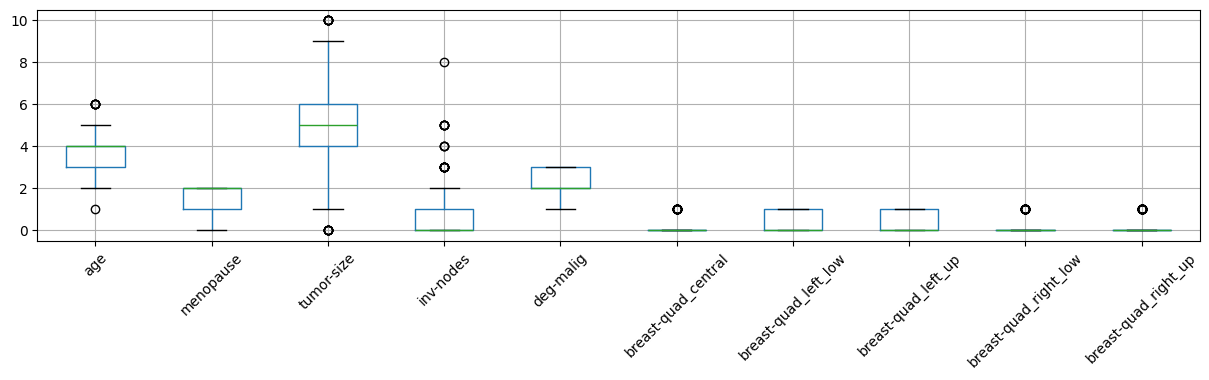

In [793]:
bcdf.boxplot(figsize=[15,3], rot=45)

Build training and testing data sets, 80% training, 20% testing

In [794]:
bcdf_targets = bcdf['Class']
bcdf_features = bcdf.drop(['Class'], axis=1)

In [795]:
DataFeatures_train, DataFeatures_test, DataTargets_train, DataTargets_test = train_test_split(bcdf_features,bcdf_targets, test_size=0.2, train_size=0.8, random_state=42)

25
0.7192982456140351
[0.9868421052631579, 0.8245614035087719, 0.8026315789473685, 0.7587719298245614, 0.7456140350877193, 0.7368421052631579, 0.7412280701754386, 0.7149122807017544, 0.7192982456140351, 0.7368421052631579, 0.7236842105263158, 0.7192982456140351, 0.7236842105263158, 0.7192982456140351, 0.7149122807017544, 0.7149122807017544, 0.7149122807017544, 0.7149122807017544, 0.7149122807017544]
[0.631578947368421, 0.6491228070175439, 0.6666666666666666, 0.6491228070175439, 0.631578947368421, 0.6491228070175439, 0.6491228070175439, 0.7017543859649122, 0.7017543859649122, 0.7192982456140351, 0.7017543859649122, 0.7017543859649122, 0.6842105263157895, 0.6491228070175439, 0.6666666666666666, 0.6666666666666666, 0.6491228070175439, 0.6491228070175439, 0.6491228070175439]


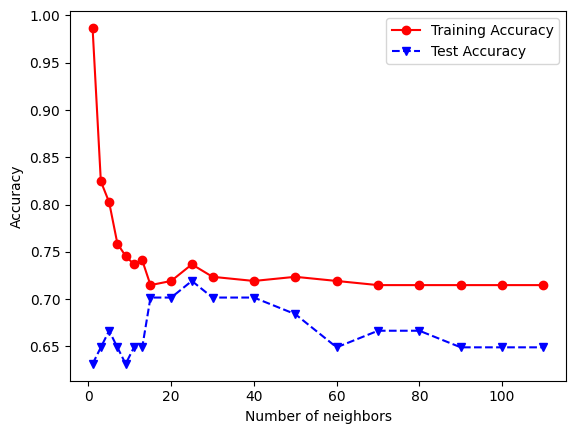

In [796]:
%matplotlib inline

numNeighbors = [1, 3, 5, 7, 9, 11, 13, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110]
trainAcc = []
testAcc = []

for k in numNeighbors:
    knnclf = KNeighborsClassifier(n_neighbors=k)
    knnclf.fit(DataFeatures_train, DataTargets_train)
    knnY_predTrain = knnclf.predict(DataFeatures_train)
    knnY_predTest = knnclf.predict(DataFeatures_test)
    trainAcc.append(accuracy_score(DataTargets_train, knnY_predTrain))
    testAcc.append(accuracy_score(DataTargets_test, knnY_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
# print('Accuracy on test data is %.9f' % accuracy_score(DataTargets_test, knnY_predTest).max())
print(numNeighbors[testAcc.index(max(testAcc))])
print(max(testAcc))
print(trainAcc)
print(testAcc)


For K-Nearest neighbors, the highest testing score was with k=25 at an accuracy of 0.7192982456140351.  Utilizing cross validation gives us a higher test score of 0.7857142857142857

In [797]:

cvknnscores = []

for k in numNeighbors:
    knncvclf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    cvknnscore_max = cross_val_score(knncvclf, bcdf_features, bcdf_targets, cv=10).max()
    cvknnscores.append(cvknnscore_max)

0.8214285714285714 5


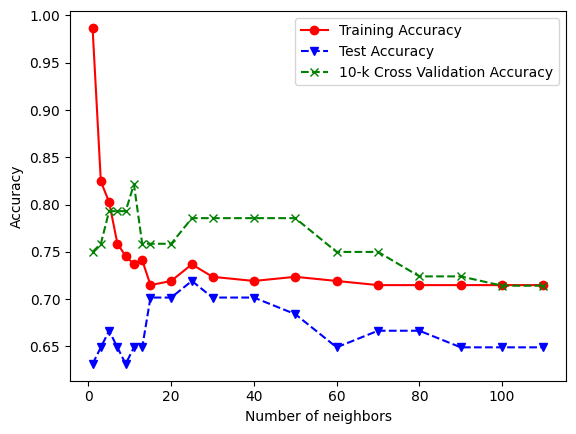

In [798]:
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--', numNeighbors, cvknnscores, 'gx--')
plt.legend(['Training Accuracy', 'Test Accuracy', '10-k Cross Validation Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print(max(cvknnscores), cvknnscores.index(max(cvknnscores)))

Random Forest Train = 0.95; Test = 0.67
1
[0.9473684210526315]
[0.6666666666666666]


Text(0.5, 1.0, 'Training vs Testing Accuracy, Random Forest; Max Depth = 5, Base Classifiers = 7')

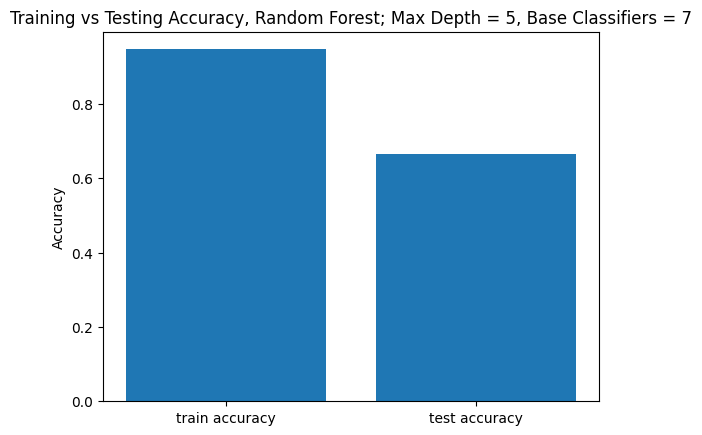

In [799]:
numBaseClassifiers = 7
maxdepth = 5
trainAcc = []
testAcc = []
data = {'train accuracy':0, 'test accuracy': 0}

rfc = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
rfc.fit(DataFeatures_train, DataTargets_train)
rfcY_predTrain = rfc.predict(DataFeatures_train)
rfcY_predTest = rfc.predict(DataFeatures_test)
trainAcc.append(accuracy_score(DataTargets_train, rfcY_predTrain))
testAcc.append(accuracy_score(DataTargets_test, rfcY_predTest))
print('Random Forest Train = %.2f; Test = %.2f'%(trainAcc[0],testAcc[0]))
data['train accuracy'] = trainAcc[0]
data['test accuracy'] = testAcc[0]

print(numNeighbors[testAcc.index(max(testAcc))])
print(trainAcc)
print(testAcc)

plt.bar(list(data.keys()), data.values())
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy, Random Forest; Max Depth = 5, Base Classifiers = 7')

0.7857142857142857


Text(0.5, 1.0, 'Training vs Testing Accuracy vs 10-k Cross Validation, Random Forest')

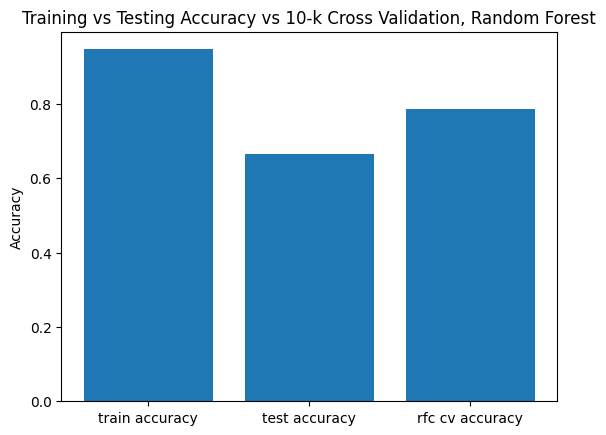

In [800]:
rfccvclf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
cvrfcscores = cross_val_score(rfccvclf, bcdf_features, bcdf_targets, cv=10)
print(cvrfcscores.max())

data['rfc cv accuracy'] = cvrfcscores.max()

plt.bar(list(data.keys()), data.values())
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy vs 10-k Cross Validation, Random Forest')

Text(0, 0.5, 'Accuracy')

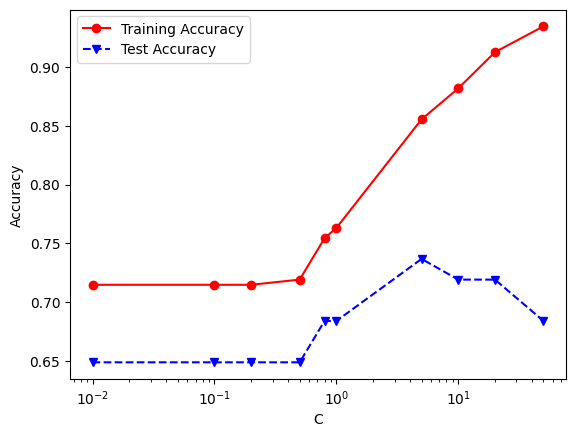

In [801]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    svclf = SVC(C=param,kernel='rbf',gamma='auto')
    svclf.fit(DataFeatures_train, DataTargets_train)
    svcY_predTrain = svclf.predict(DataFeatures_train)
    svcY_predTest = svclf.predict(DataFeatures_test)
    SVMtrainAcc.append(accuracy_score(DataTargets_train, svcY_predTrain))
    SVMtestAcc.append(accuracy_score(DataTargets_test, svcY_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

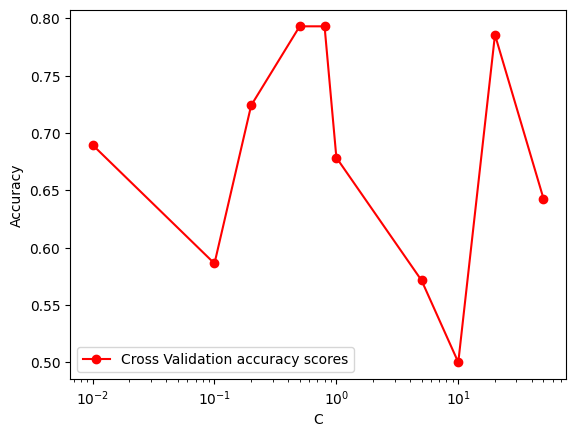

In [802]:
svmcvclf = SVC(C=param,kernel='rbf',gamma='auto')
scores = cross_val_score(svmcvclf, bcdf_features, bcdf_targets, cv=10)

plt.plot(C, scores, 'ro-')
plt.legend(['Cross Validation accuracy scores'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Confusion Matrix of above algorithms

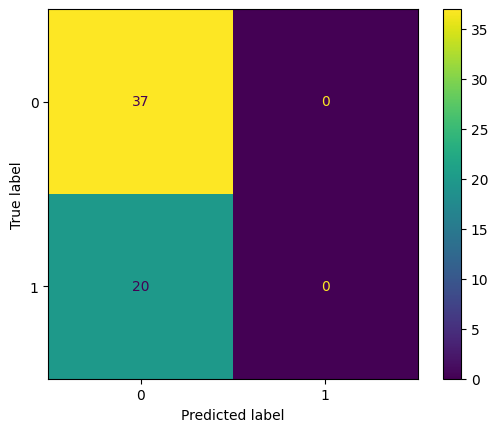

In [803]:
knnclf_cf = KNeighborsClassifier(n_neighbors=25, metric='minkowski', p=2)
knnclf_cf.fit(DataFeatures_train, DataTargets_train)
knnY_predTest_cf = knnclf_cf.predict(DataFeatures_test)
ConfusionMatrixDisplay.from_predictions(DataTargets_test,knnY_predTest)

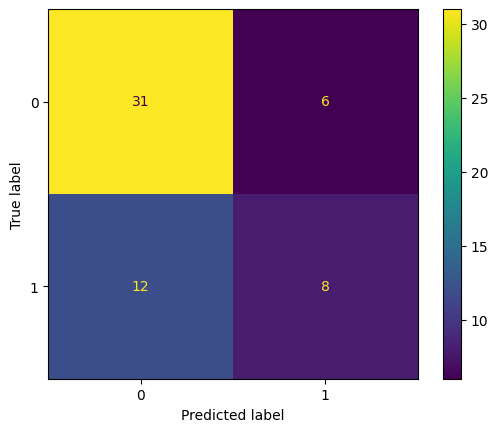

In [804]:
ConfusionMatrixDisplay.from_predictions(DataTargets_test,svcY_predTest)

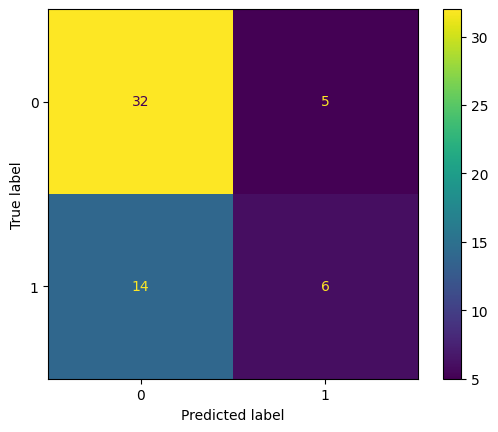

In [805]:
ConfusionMatrixDisplay.from_predictions(DataTargets_test, rfcY_predTest)

In [819]:
print("                    KNN Algorithm\n******************************************************\n", classification_report(DataTargets_test, knnY_predTest))
print("                    RFC Algorithm\n******************************************************\n", classification_report(DataTargets_test, rfcY_predTest))

                    KNN Algorithm
******************************************************
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        37
           1       0.00      0.00      0.00        20

    accuracy                           0.65        57
   macro avg       0.32      0.50      0.39        57
weighted avg       0.42      0.65      0.51        57

                    RFC Algorithm
******************************************************
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        37
           1       0.55      0.30      0.39        20

    accuracy                           0.67        57
   macro avg       0.62      0.58      0.58        57
weighted avg       0.64      0.67      0.64        57



/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U